
<font size = "5"> **Lecture 10:  [Analysis of Spectoscopy Data in STEM](https://github.com/gduscher/ML-ElectronMicroscopy-2023/tree/main/Lecture%2010)** </font>


<hr style="height:1px;border-top:4px solid #FF8200" />


# Bethe Theory

[<img src=https://www.coeuscreativegroup.com/wp-content/uploads/2020/04/download-button.png, width=125>](https://github.com/SergeiVKalinin/ML-ElectronMicroscopy-2023/raw/main/Lecture%2010/0_Bloch.ipynb) 

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SergeiVKalinin/ML-ElectronMicroscopy-2023/blob/main/Lecture%2010/0_Bloch.ipynb)

part of Online Course

<font size = "5"> **[Machine Learning in Scanning Electron Microscopy 2023](https://github.com/SergeiVKalinin/ML-ElectronMicroscopy-2023)**</font>

<font size = "3"> **[Lecture 10](https://github.com/gduscher/ML-ElectronMicroscopy-2023/tree/main/Lecture%2010)**</font>

by Gerd Duscher, 

Microscopy Facilities
Materials Science & Engineering<br>
Institute of Advanced Materials & Manufacturing<br>
The University of Tennessee, Knoxville

## Prerequesites

### Install pyTEMlib

In Google Colab you have to install first all the necessary additional packages. For a local installation, this has to be run only once.


## Import numerical and plotting python packages
Import the python packages that we will use:

We will use only the basic numerical (numpy) and plotting (pylab of matplotlib) libraries:


In [3]:
import sys

from pkg_resources import get_distribution, DistributionNotFound

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = (get_distribution(package_name).version)
    except (DistributionNotFound, ImportError) as err:
        version = '-1'
    return version


# pyTEMlib setup ------------------
if test_package('ipympl') < '0':
    print('installing ipympl')
    !{sys.executable} -m pip install ipympl
    
# ------------------------------
print('done')

done


In [4]:
%matplotlib  ipympl
import matplotlib.pyplot as plt
import numpy as np

if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()


## Notation

In the following I will introduce this Bethe diffraction theory in Dirac's  bra--ket notation.
$$
|\psi\rangle = {\rm ket} = \psi_1 |1\rangle + \psi_2 |2\rangle
= \left( \begin{array}{c} \psi_1 \\\psi_2  \end{array} \right)= {\rm column\ vector}\\
\langle \phi| = {\rm bra} = \phi^*_1\langle 1|  + \phi^*_2 \langle 2|
= \left( \phi^*_1 ,\phi^*_2 \right)= {\rm row\ vector}
$$
Consequently the Dirac "bracket" is:
$$
\langle \phi|\psi\rangle = \left( \phi^*_1 ,\phi^*_2 \right) \left( \begin{array}{c} \psi_1 \\\psi_2  \end{array} \right) = \phi^*_1 \psi_1 +\phi^*_2 \psi_2
$$

Similarly 

$$
|\psi\rangle \langle \phi| = {\rm a\ matrix}
$$
and this will make it easier to follow the equations of many beams in diffraction, which otherwise can become very messy.

Throughout this chapter we will use the notation for the wave vector common in solid state physics and not the one found in many crystallography books ($k=1/\lambda$):
\begin{equation}
k = \frac{2\pi}{\lambda} = \frac{\sqrt{2meE}}{\hbar}
\end{equation} 
with:
- $\lambda$: wavelength
- $m=\gamma_0$: relativistically corrected mass of the electron
- $\gamma = 1+\frac{e^2E^2}{2m_0c^2}$: relativistic correction necessary for $E$ above 2kV 
- $e$: electron charge
- $E$: acceleration voltage
- $c$: speed of light in vacuum

This is the short version of quantum mechanics. The Axioms of quantum mechanics are:


1. The state of a system is described by its state vector $|\psi\rangle$.

2. An observables are expressed by hermitic operators $A$
3. The mean value of an observable is given by $\langle A \rangle$
4. The time dependence is given by the time-dependent Schrödinger  
    equation: $ H|\psi,t\rangle = i\hbar \frac{\partial}{\partial t} |\psi,t\rangle $
5. If you measure $A$ the system changes to $|n\rangle$ if $a_n$ was measured

Axioms 2. and 3. give:

If a system is in the state $|\psi\rangle = \sum_n c_n |n\rangle$

with $c_n = \langle n|\psi\rangle$, where $|n\rangle$ are the Eigen states of $A$, meaning $A|n\rangle = a_n |n\rangle$. The probability to find the value $a_n$ when measuring $A$ is given by $|c_n|^2$.

## Introduction to Bethe Theory

The dynamic theory calculates the probability of a transition from an initial state $|i\rangle$ to a final state $|f\rangle$. In our case, the initial state $|i\rangle$ is the incoming beam which scatters to a final state the Bragg reflection $|f\rangle$.
What we want to know is the transition probability from the initial to the final state:
\begin{equation}
\omega_{i\rightarrow f} =  \langle i |T|f\rangle 
\end{equation}
the initial state is the beam with wave vector $\vec{k}_0$ and the end state is a wave-vector of diffracted beam according to Bragg's law $\vec{q} = \vec{g}$.
The above equation now looks like this:
\begin{equation}
\omega_{0\rightarrow g} = \langle 0 |T|g\rangle 
\end{equation}

For the stationary problems the states $|\psi,t\rangle$ can be expressed as:
\begin{equation} 
|\psi_n,t\rangle = \exp(-E_nt/\hbar) |\psi_n\rangle
\end{equation}
and we get the time-independent Schröinger equation for $|\psi_n\rangle$:
\begin{equation}
H|\psi_n\rangle = E_n |\psi_n \rangle
\end{equation}

For the incoming wave, we get:

\begin{equation}
H_0 = { -\frac{h^2}{8\pi^2} \nabla^2 }
\end{equation} 
which expresses the kinetic energy.

Within a crystal the Hamiltonian will change to:
\begin{equation}  
H = H_0 + V
\end{equation} 
We have  the Schrödinger equation for the incoming wave:
\begin{equation}
(H_0 ) |\vec{k}\rangle = E_k |\vec{k}\rangle
\end{equation}

and we want to solve: 
\begin{equation}
(H_0 +V) |\psi\rangle = E_k |\psi\rangle
\end{equation}

which we transform with equation \ref{IncomingWave}:


> Effectively, we changed in the integral equation.

\begin{equation*} 
|\psi\rangle = |\vec{k}\rangle + \frac{1}{E_k -H_0}V|\psi\rangle
\end{equation*} 

### Hamiltonian in Bethe Theory
For our diffraction experiment is often better to use a Hamiltonian that contains the wave vector:
\begin{equation} 
H_0 = { -\Delta_\rho -\xi^2 }
\end{equation} 

OOps, where is the wavevector $\vec{k}$? 

I replaced it by $\xi$ which is the effective deviation from wavevector $\vec{k}$

We also take into account that our electrons are very fast and distort the space, reducing the problem to two dimensions ($\rho = (x,y)$.
The crystal potential V has then to be changed as well to:
\begin{equation}
V = V(\rho,z)
\end{equation} 
and the full Hamiltonian is changed to:
\begin{equation}
H = \frac{1}{k_z} \left(H_0 + V(\rho,z) \right)
\end{equation} 

The time- independent wave equation is then:
\begin{equation}
\nabla^2 \psi  + k^2 \psi = 0
\end{equation}
with the plane wave solution:
\begin{equation}
\psi  = \exp(\pm\vec{k}\bullet\vec{r}) = 0
\end{equation}

## Schrödinger  Equation of Bethe Theory

The Bethe theory is based on the (time independent, non relativistic) Schrödinger  equation:

\begin{equation}  
\Big[ \underbrace{ -\frac{h^2}{8\pi^2} \nabla^2 }_{{\rm kinetic\ energy}} +\underbrace{ \mathcal{V}(\vec{r})}_{{\rm pot. energy}} \Big]\, |\psi(\vec{r}) \rangle = \underbrace{\mathcal{E}}_{{\rm total\ energy}} \underbrace{|\psi(\vec{r})\rangle }_{{\rm wave\ function}}
\end{equation} 

What does that mean for the TEM?
>
> We have a acceleration voltage (electric field potential) $E$ of 100kV
>
> We have a charge of the electron $q$ with the value $e$.
>
> We have a total Energy $-\mathcal{E} = E\cdot q$ which is just $E$ in the units of $[eV]$.
>
> We have a crystal with the potential $V(\vec{r})$, which we declare positive inside the crystal and zero outside.
>
> We have a potential Energy $\mathcal{V}(\vec{r}) = q\cdot V(\vec{r})$.


Now, that we declared all our variables we can transform the Schrödinger equation we started with to:

$$
\nabla^2  |\psi(\vec{r})\rangle = -\frac{8\pi m e}{h^2}\,  [E+V]\, |\psi(\vec{r})\rangle 
$$

The left hand part of this equation is the impulse of the electron and the right hand part consists of a total energy part, which is boring and a part which originates from the crystal (interesting!). 


## Bloch Waves in Bethe Theory
Well, if the potential is periodic, then the solution (wave function) must be periodic, too.

First we make a substitution in case our wave function is complicated: we define it as a linear combination of other waves. That is a useful trick, which makes the mathematics easier as we'll see in a bit.
$$
|\psi(\vec{r})\rangle = \sum_j |b_j\rangle \\
|b_j\rangle  =  = |b(\vec{k}^{(j)}, \vec{r})\rangle
$$

The $ |b(\vec{k}^{(j)}, \vec{r})\rangle $ are called Bloch waves and are only defined for specific $\vec{k}$-vectors,
because the  $|b(\vec{k}^{(j)}, \vec{r})\rangle$ are plane waves, each traveling in $k^{(j)}$ direction. For the $|\psi(\vec{r})\rangle$ we did not and could not have made any assumption like that.\\


Now, we express the fact that these Bloch waves are indeed plane waves mathematically:

\begin{equation}
|b^{(j)}(\vec{r})\rangle  = b(\vec{k}^{(j)}, \vec{r})=\mu(\vec{k}^{(j)}, \vec{r})\cdot e^{2\pi i \vec{k}^{(j)} \vec{r}} = \underbrace{\mu^{(j)}(\vec{r})}_{{\rm Bloch\ function}}   e^{2\pi i \vec{k}^{(j)} \vec{r}}
\end{equation} 

by dividing it in a plane wave part (the exponential function) and a amplitude part (the Bloch function).
Because of the periodicity which we assume for the solution, we expand the Bloch waves in a into a Fourier series, again (the same as in equation \ref{FourierExpand} for the potential). 

\begin{equation}
b^{(j)}(\vec{r}) = \sum_g C_g^{(j)} e^{2\pi i (\vec{k}^{(j)} + \vec{g}) \vec{r}}
\end{equation}
The sum in this equation goes over all excited (aha!) points in the reciprocal lattice, including the incident direction $g_1 = 0$. (  \vec{g} are defined through the Milller indices as (h/a, k/b, l/c), where the (a,b,c) are the real space lattice vectors).

Theoretically, there are an infinite number of $\vec{g}$ vectors, but only few are allowed and only a few have a small excitation error.  

So in practice there are only a few $\vec{g}$ vectors to consider.

## Crystal Potential in Bethe Theory

The crystal potential is periodic and so we also make a Fourier expansion of that potential
$$
V = V(x,y,z) = V(\vec{r}) = \sum_g V_g \exp(2\pi i\vec{g}\cdot\vec{r})
$$

The Fourier component of the crystal potential (in Volts) consists of several atoms $j$ over which we sum:
$$
V_g = \frac{h^2}{2 \pi m_0 e} \frac{1}{\Omega} \sum_j  f_{e_j}(\vec{g}) \exp(-2\pi i\vec{g}\cdot\vec{r_j})\\
= \frac{2 \pi  e a_0}{\Omega} \sum_j  f_{e_j}(\vec{g}) \exp(-2\pi i\vec{g}\cdot\vec{r_j})\\
$$
where:

- $f_{e_j}$: atomic form (atomic scattering) factor of the $j$th atom
- $e$: charge of electron
- $m_0$: rest mass of electron
- $a_0$: Bohr radius
- $\Omega$: Volume of the unit cell

## Solution of Bethe Theory


Now, so far we haven't done anything, but substitute and expand. Let's put all this into the Schrödinger equation \ref{Schrodinger} 
\begin{equation}
4\pi \left[ K^2 - (k_0^{(j)} + g)^2 +\sum_{h \neq 0} U_h e^{2\pi i \vec{h}\vec{r} }  \right] \cdot C_g^{(j)} e^{2\pi i (\vec{k}_o^{(j)} +\vec{g})\cdot \vec{r} }= 0
\end{equation}
This can only be zero, if all coefficients with same exponential function simultaneous become zero; this results in a set of equations, after collecting up terms containing the factor 
$e^{2\pi i (\vec{k}_o^{(j)} +\vec{g})\cdot \vec{r} }$:
\begin{equation} 
\left[ K^2 -(\vec{k}_o^{(j)} +\vec{g})^2 \right] C_g^{(j)} + \sum_{h\neq 0} U_h C_{g-h}^{(j)}=0; \qquad \vec{g}=\vec{g}_1, \vec{g}_2, ..., \vec{g}_n 
\end{equation}

I made use of an abbreviation:
\begin{equation}
K=\frac{1}{h}\left[ 2m_0 E (1+\frac{E}{2E_0}) +2m_0 e U_0(1+\frac{E}{E_0}) \right]^{\frac{1}{2}}
\end{equation}
for the wave vector inside the the crystal which are not identical to the magnitude of the wave vectors of the Bloch waves $\vec{k}_g^{(j)}=\vec{k}_o^{(j)} +\vec{g}$.

Please note, that I introduced relativistic corrections (the terms in the round brackets in the equation above), too. It is enough to add this corrections for the energy at this point; it is not necessary to solve the Dirac equation (relativistic  Schrödinger equation).

The set of equations defined in \ref{setEquat} are essential for the  understanding of dynamic diffraction. Let's look at it a little more closely. 

We get for each $j$ one equation; and this means we get for each Bloch wave one equation.

The second term in equation \ref{setEquat} (the term with the sum) mixes the Bloch waves ($C_{g-h}^{(j)}$). Effectively, we state that the inner potential $U_h$ mixes the Bloch waves; this is called dynamical coupling.

> **In summation:**
>
> We separated the problem! 


## Two Beam Case
We rewrite the matrix expression for the boundary condition in the two beam case:
\begin{equation}
\left(
\begin{matrix}
C_{0}^{(1)} &  C_{0}^{(2)} \\
C_{g}^{(1)} & C_{g}^{(2)} \\
\end{matrix}
\right) \cdot 
\left(
\begin{matrix}
\epsilon^{(1)} \\
\epsilon^{(2)} \\
\end{matrix}
\right) =
\left(
\begin{matrix}
\phi_0^{(0)} \\
\phi_g^{(0)} \\
\end{matrix}
\right) =
\left(
\begin{matrix}
1 \\
0\\
\end{matrix}
\right) 
\end{equation}

In the kinematic case, the centers M of the various Ewald spheres (for the various incident directions) lay on a sphere of radius $k=\frac{1}{\lambda}$ around the origin of the reciprocal lattice. At some point the intensity in the diffracted beam will be more intense than in the incident beam, and therefore, we have to treat this scattered beam now in the same way we have treated the incident beam before: we need an Ewald sphere of radius $k$ for this direction/ for this reciprocal lattice point $\vec{g}$. Now we have two Ewald spheres, one around the origin $0$ and one around the reciprocal lattice point $\vec{g}$. The two spheres are not allowed to intersect each other, but a smooth kind of complicated surface has to be constructed.

The fundamental equations of the dynamic theory for the two beam case are:

$$
-\gamma^{(j)} C_0^{j} + \frac{U_g}{2K} C_g^{(j)} = 0\\
\frac{U_g}{2K} C_0^{j} + (-\gamma^{(j)}+s) C_g^{(j)} = 0
$$

Such a homogeneous linear equation system for the $C_g^{(j)}$ has a non-zero solution of and only if the determinant of the coefficients is zero:

\begin{equation}
\left|
\begin{matrix}
-\gamma^{(j)} & \frac{U_g}{2K}\\
\frac{U_g}{2K}& (-\gamma^{(j)}+s)\\
\end{matrix}
\right| = {\gamma^{(j)}}^2 -s\gamma^{(j)}-\frac{U_g^2}{4K^2} =0
\end{equation}

Which is the same as the Howie-Whelan equation \ref{HaW3} with $\xi_g = K^2/U_g$,
but now we know that the $\gamma^{(j)}$ are the Eigenvalues of a matrix problem.

Solution:
$$
\gamma^{(j)}  = \frac{1}{2} \left[ s-(-1)^j \sqrt{(U_g/K)^2 +s^2}   \right]\\
= \frac{1}{2} \left[ s-(-1)^j \sqrt{(1/\xi^2 +s^2}   \right]\\
= \frac{1}{2\xi_g} \left[ w-(-1)^j \sqrt{(1+w^2}   \right]\\
$$

We made the substitution $w =s\xi_g$, in which the parameter $w$ characterizes the tilt out of the exact Bragg condition ($w=0$). The excitation error $s$ is zero in the exact Bragg condition, isn't it.

 The separation is $\Delta k_{z,min} = \gamma^{(1)}-\gamma^{(2)}= \frac{U_g}{2K}=\frac{1}{\xi_g}$.

By use of the eigenvalues $\gamma^{(j)}$, the linear systems of equations can be solved for the $C_g^{(j)}$. For the amplitude $\epsilon^{(j)} C_g^{(j)} = C_0^{j} C_g^{(j)}$ of the four Bloch waves with the vector $\vec{k}_0^{(j)}+\vec{g}$ we obtain:
$$
C_0^{j} C_0^{(j)} = \frac{1}{2}\left[ 1 + (-1)^j \frac{w}{\sqrt{1+w^2}} \right]\\
C_0^{j} C_g^{(j)} = -\frac{1}{2}\left[  \frac{(-1)^j}{\sqrt{1+w^2}} \right]
$$

We put this into the equation for the scattered wave and substitute the thickness $t$ for the $z$ component of the vector $\vec{r}$:
$$
\psi_0(t) = \sum_{j=1}^2 C_0^{j} C_0^{(j)}e^{2\pi i k_z^{(j)}t}\\
\psi_g(t) = \sum_{j=1}^2 C_0^{j} C_g^{(j)}e^{2\pi i k_z^{(j)}t}\, e^{2\pi i k_z gx}
$$
and we find (omitting common phase factors):
$$
\psi_0(t)= \cos (\pi \sqrt{1+w^2}\frac{t}{\xi_g})  - \frac{iw}{\sqrt{1+w^2}} \sin (\pi \sqrt{1+w^2}\frac{t}{\xi_g})\\
\psi_g(t)=    \frac{i}{\sqrt{1+w^2}} \sin (\pi \sqrt{1+w^2}\frac{t}{\xi_g}) \, e^{2\pi i k_z gx}
$$

The intensities of the transmission $T$ and reflection $R$ become:
\begin{equation}
\underbrace{\psi_g \psi_g^*}_R = \underbrace{1-\psi_0 \psi_0^*}_{1-T} =  \frac{1}{1+w^2} \sin^2 (\pi \sqrt{\sqrt{1+w^2} ( \frac{1}{\xi_g}})_{s_{eff}} \cdot t)
\end{equation}

The solution is the Pendellösung of two coupled oscillators (in mechanics: two pendulums connected with a spring).

Even in exact Bragg condition, the intensity oscillates between primary beam and Bragg reflected beam with increasing film thickness. Look at the plot below, the Pendellösung is shown without absorption. 

Normally one would want to add an absorption term to reduce the intensity with thickness. This absorption term is better named a damping term and stems form the inelatic scattering to random angles instead of the  considered (here two)  Bragg angles



These oscillations of the intensities are commonly called ``rocking curve``.



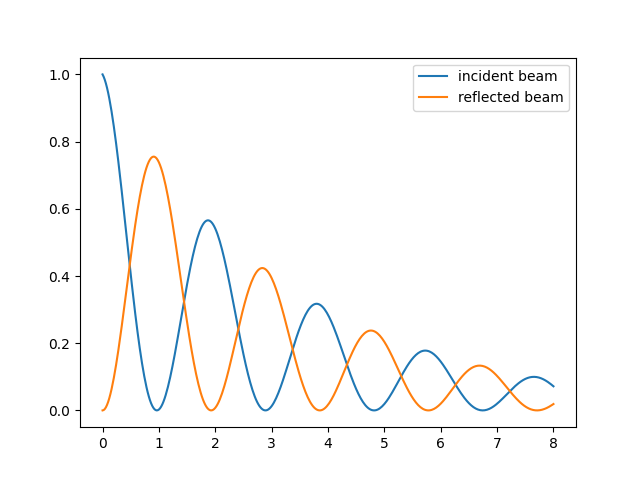

In [5]:
# ------ Input ------
xi_g = 4  # extiction distance (in terms of relative thickness )
omega = 0.4 # tilt from Bragg condition
damping = 0.3
# --------------------

t = np.linspace(0,8,401)


plt.figure()
plt.plot(t, (1-np.sin(np.pi * np.sqrt(np.sqrt(1.+ omega**2)*1/xi_g)*t)**2) * 1/np.exp(t*damping), label='incident beam')
plt.plot(t, np.sin(np.pi * np.sqrt(np.sqrt(1.+ omega**2)*1/xi_g)*t)**2 * 1/np.exp(t*damping), label='reflected beam')

plt.legend();

## Summary of Bethe Theory
The solution is the Pendellösung of two coupled oscillators.

The periodicity is the extinction length $\xi$, which tells at which thickness a beam is completely vanished.

Considering some absorption (well it's not a real absorption, but inelastic scattering) then we see that the amplitudes decrease slowly.

## Using Bethe Theory for Thickness Determination

We will do this in a lab and it will be your homework.

- The accurate thickness of the sample is an important but hard to obtain parameter, but it influences the contrast in all imaging modes.
- Be aware that with different techniques you perform different thickness measurement. In any high resolution image and diffraction experiment, you always look at the thickness of the crystalline part of the sample, omitting the contribution of contamination and amorphous surface layer (from sample preparation). 
- In the Analytic Section of this class we learn how to the thickness from the  whole sample. 

We can observe the above rocking curve in convergent beam electron diffraction patterns (CBED).

But we have to ensure that:
- Excitation error is as small as possible 
- We are in two beam condition

### Experimental Considerations
- Choose a convergence angle $\alpha$ so that $\alpha < \theta_B$, to avoid overlapping of disks in the ZOLZ.
- The 000 disk usually contains concentric diffuse fringes, the Kossel-Möllenstedt fringes 

- If you move the specimen, then you will see that the number of this fringes changes. In fact the number of each fringes increases by one every time the thickness increases by one extinction length. 
- The foil thickness can be measured precisely at the point where you do your other analysis. 

Please be aware that dynamic effects also occur for the HOLZ lines in a CBED pattern.

In practice to simplify the interpretation, we don't use zone axis conditions, but tilt to two--beam conditions with only one strongly excited Bragg beam. 
- The CBED disks contain then parallel rather than concentric intensity oscillations as shown in the earlier figure. 
- In fact, this intensity oscillations are equivalent to the rocking curve intensity oscillations discussed earlier.
- It helps, of you use an energy filter for this method.


### Thickness Determination
Because the oscillations are symmetric in the hkl disk we concentrate the analysis on this disk. 
- The middle of the hkl disk is bright and originates from the exact Bragg condition ($\vec{s}=0$). 
- We measure the distance between the midle (bright fringe) of the $hkl$ disk and the dark lines.

You obtain a deviation $s_i$ for each fringe from the equation:
\begin{equation}
s_i=\lambda\frac{\Delta\theta_i}{e\theta_B d^2}
\end{equation}
The Bragg angle $\theta_B$ is known from the separation of two disks and the lattice spacing $d$ is known from the sample or can be calculated through the camera length.

If the extinction distance $\xi_g$ is known you can calculate the foil thickness $t$ with:
\begin{equation}
\frac{1}{t^2} = \frac{s_1^2}{n_k^2}+\frac{1}{\xi_g^2n_k^2}
\end{equation}
where $n_k$ is an integer.

### Data Analysis
- assign $n=1$ to the first fringe $s_1$
- assign $n=2$ to the second fringe $s_2$
  and so on for all other fringes
- plot $(s_1/n_k)^2$ versus $(1/n_k)^2$.
- if you get a straight line, then you are finished and you have $k=i+j$, where $j$ is the largest integer $<(t/\xi_g)$.
- if not repeat the same thing with $n=2$ for $s_1$, $n=3$ for $s_2$, etc.
- repeat this increase by one till you get a straight line
- the slope of the line is $1/\xi_g^2$
- the extrapolated value for $1/n_k^2$ is $1/t^2$.

The whole procedure is summarized in the figure below.

![CBED-thickness](images/CBED-thickness.jpg)

## More about Bloch Waves
We can replace the  exponential functions by trigonometric functions and get:
$$
A^{(1)} = \cos \frac{\beta}{2}\\
A^{(2)} = \sin \frac{\beta}{2}
$$
Some of the Bloch waves are located (have their maxima) between the atoms. These Bloch waves channel and are more or less undisturbed.

Another set is located on the atomic rows and will cause much more inelastic scattering than the other, also they will travel much faster.

The second set is especially important for Z-contrast image, where a small convergent beam is located at the atomic rows. You might consider the atoms like little lenses which keep the beam focused on the column.